# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

**Dataset:** Rio de Janeiro Airbnb Reviews

This topic stems from my recent visit to Rio de Janeiro, Brazil this past September.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re, string, warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline


text_data = [
    "Lovely flat in Copacabana, two minutes walk to beach and friendly host answered all our questions.",
    "Clean apartment, good wifi, but the building was noisy late at night and walls are thin.",
    "Amazing view of Sugarloaf Mountain from the balcony — worth every penny.",
    "Host was super responsive, check-in was easy, location great for restaurants and metro.",
    "Was disappointed by the cleanliness and the smell in the corridor, but the beach access was fantastic.",
    "Quiet street two blocks from Ipanema, comfy bed and air conditioning worked well.",
    "Loved the morning coffee on the terrace overlooking the city, beach right there.",
    "Check-in was chaotic, elevator always crowded, but apartment itself had nice decor and kitchen.",
    "Perfect location near bars and nightlife in Lapa, though the neighbors were a bit loud after midnight.",
    "Very helpful host, provided local tips and spent time showing us around when we arrived."
]

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    words = [w for w in text.split() if w not in ENGLISH_STOP_WORDS]
    return " ".join(words)

cleaned = [clean_text(t) for t in text_data]
print(len(cleaned), "reviews cleaned")
print(cleaned[:2])


10 reviews cleaned
['lovely flat copacabana minutes walk beach friendly host answered questions', 'clean apartment good wifi building noisy late night walls']


         Word  Frequency
0       beach          3
1        host          3
2   apartment          2
3     checkin          2
4    location          2
5      lovely          1
6        flat          1
7  copacabana          1
8     minutes          1
9        walk          1


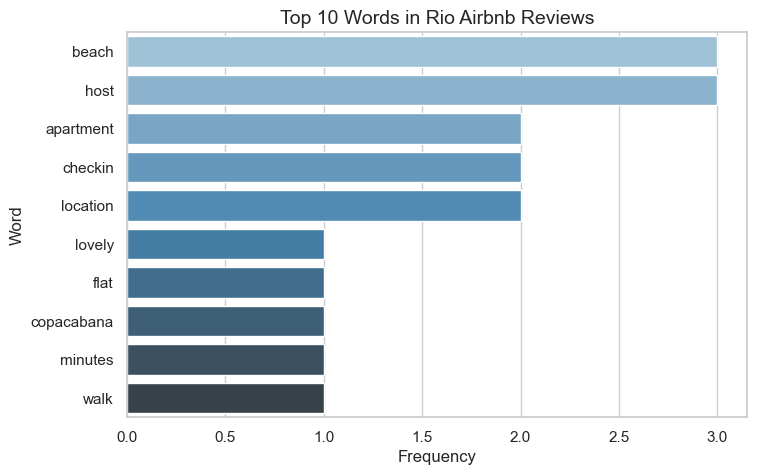

In [2]:
all_words = " ".join(cleaned).split()
word_counts = Counter(all_words)
df_words = pd.DataFrame(word_counts.most_common(10), columns=['Word','Frequency'])

print(df_words)

plt.figure(figsize=(8,5))
sns.barplot(x='Frequency', y='Word', data=df_words, palette='Blues_d')
plt.title("Top 10 Words in Rio Airbnb Reviews", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


**Interpretation – Word Frequency Chart:**  
The bar chart shows that *beach*, *host*, and *location* appear most frequently.  
This suggests that guests value convenience, friendliness, and proximity to attractions.


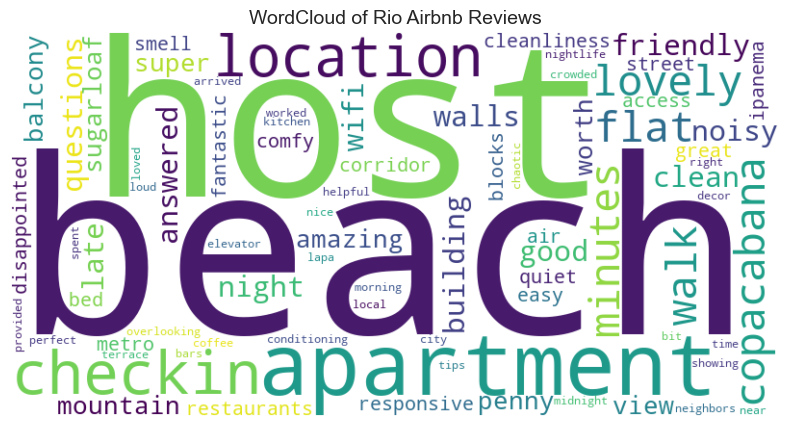

In [3]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(cleaned))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Rio Airbnb Reviews", fontsize=14)
plt.show()


**Interpretation – WordCloud:**  
The WordCloud displays the same terms visually, with larger words representing higher frequency.


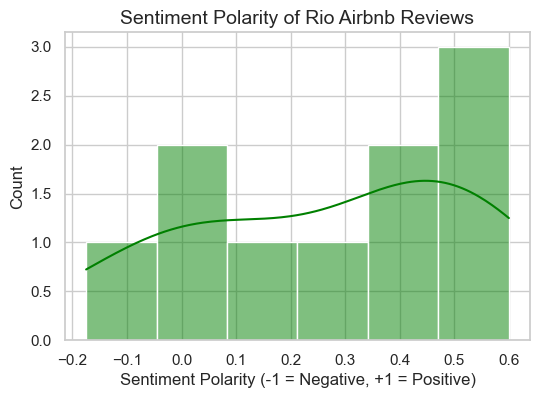

,Review,Sentiment
0,"Lovely flat in Copacabana, two minutes walk to...",0.283333
1,"Clean apartment, good wifi, but the building w...",0.091667
2,Amazing view of Sugarloaf Mountain from the ba...,0.450000
3,"Host was super responsive, check-in was easy, ...",0.522222
4,Was disappointed by the cleanliness and the sm...,-0.175000
5,"Quiet street two blocks from Ipanema, comfy be...",0.000000
6,Loved the morning coffee on the terrace overlo...,0.492857
7,"Check-in was chaotic, elevator always crowded,...",0.600000
8,Perfect location near bars and nightlife in La...,0.400000
9,"Very helpful host, provided local tips and spe...",0.033333


In [4]:
sentiments = [TextBlob(t).sentiment.polarity for t in text_data]
df_sent = pd.DataFrame({'Review': text_data, 'Sentiment': sentiments})

plt.figure(figsize=(6,4))
sns.histplot(df_sent['Sentiment'], bins=6, kde=True, color='green')
plt.title("Sentiment Polarity of Rio Airbnb Reviews", fontsize=14)
plt.xlabel("Sentiment Polarity (-1 = Negative, +1 = Positive)")
plt.ylabel("Count")
plt.show()

df_sent


**Interpretation – Sentiment Distribution:**  
Most reviews are positive, showing that visitors generally enjoyed their stay in Rio.
